<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Hola Ezequiel, muchas gracias por la revisión, ya realice las correcciones que me dejaste, espero que ya haya quedado todo.
</div>


# Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

El objetivo del proyecto será explorar los datos del archivo e identificar que características contienen los títulos de videojuegos más exitosos. Para lograr el objetivo, es necesarios estudiar estudiar el archivo; preparar los datos para su analisis; analizar los datos; crear perfiles de estudio; probar las hipotesis formuladas y llegar a  conclusiones del analisis.


## Inicio 

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from scipy import stats as st
import math
from scipy.stats import levene
import seaborn as sns
from scipy.stats import levene


## Cargar datos

In [2]:
# Carga del archivo en el df
try:
    data = pd.read_csv("/datasets/games.csv")
    
except:
    data = pd.read_csv("games.csv")



## Preparar los datos

In [3]:
# Impresion la información general/resumen sobre el DataFrame 
data.info()
print()
print(f"Número de filas del conjunto de datos: ",data.shape[0])
print(f"Número de columnas del conjunto de datos: ",data.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Número de filas del conjunto de datos:  16715
Número de columnas del conjunto de datos:  11


Podemos observar que el nombre de las columnas alterna mayusculas y minúsculas, se estandarizara a todo en minúsculas.
De igual manera, muchos datos alternan mayusculas y minusculas, se cambiará a minúsuculas todos los datos tipo string.

Se observa que la columna `Name` le faltan nombres de títulos, debido a que es un campo indispensable se eliminarán las filas. 

En la columna `Year_of_Release` hacen falta datos, se realizará una investigación para estudiar la viabilidad de su llenado. De igual manera, los valores son de tipo float, los años son enteros por consiguiente cambiaremos el tipo de datos a int.

La columna `Genre` hacen falta datos, se realizará una investigación para estudiar la viabilidad de su llenado.

Para la columna `Critic_Score` hacen falta datos, se realizará una investigación para estudiar la viabilidad de su llenado.

La columna `User_score` hacen falta datos, se realizará una investigación para estudiar la viabilidad de su llenado. De igual manera, los valores son de tipo object, lo normal sería que fueran de tipo float porque calificacione númericas.

La columna `Rating` hacen falta datos, se realizará una investigación para estudiar la viabilidad de su llenado.

In [4]:
# Impresión muestra de los datos
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
# Se ponen en minúsculas todas las columnas
data.columns = data.columns.str.lower()

In [6]:
# Comprobación del cambio
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Datos name

In [7]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Se eliminaran de la lista estos juegos que no tienen nombre.

In [8]:
print("Porcentaje de datos perdidos:", len(data.query('name.isna()'))/len(data)*100, "%")

Porcentaje de datos perdidos: 0.011965300628178284 %


No corresponde ni al 1% de los datos, no tendra un impacto en el analisis.

In [9]:
# Se eliminan lo valores ausentes
data = data.query('name.isna() == False').reset_index(drop= True)

In [10]:
# Se comprueba la eliminación 
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [11]:
# Se ponen en minúsculas 
data["name"] = data["name"].str.lower()

In [12]:
print("Cantidad de juegos distintos:", len(data["name"].unique()))

Cantidad de juegos distintos: 11559


Son muchos nombres distintos para verlos al mismo tiempo. La razon por la que coinciden con el número de filas, es porque deben de haber títulos que son multiplataforma y el nombre se repite.


### Datos platform

In [13]:
data["platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Se realizó una breve investigación para corroborar todas las abreviaciones. Todas las consolas existen y no hay mal escrito.

In [14]:
# Se ponen en minúsculas 
data["platform"] = data["platform"].str.lower()


### Datos year_of_release

In [15]:
print("Porcentaje de datos faltantes en la colunmna year_of_release",
      round(len(data.query('year_of_release.isna()'))/len(data)*100, 2), "%")

Porcentaje de datos faltantes en la colunmna year_of_release 1.61 %


Tenemos un 1.6% de los datos fatlas en la columna `year_of_release`, no son muchos, pero intentaremos rellenar todos los que se puedan inferir del dataframe.

In [16]:
data.query('year_of_release.isna()').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,x360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,gba,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,lego indiana jones: the original adventures,wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,call of duty 3,wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,rock band,wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Hay juegos que salieron en distintas palataformas, por consiguiente buscaremos si los juegos con valores ausentes existen en otras paltaformas que contengan año. Aplicaremos el método moda para saber cuando fue el año más común en que salió y se lo aplicaremos.

In [17]:
#Creación de lista para videojuegos que salieron en distintas paltaformas
index_year = data.query('year_of_release.isna()')["year_of_release"].index
name_na_year = data.loc[index_year]["name"].values
mode_year = []
for game in name_na_year:
    mode_year.append(data.query('name == @game').mode()["year_of_release"].iloc[0])

In [18]:
# Se aplican los valores de la lista en el dataframe
data.loc[index_year, ["year_of_release"]] = mode_year

Al parecer se llenaron varios valores, pero desafortunadamente no todos salieron y varias plataformas. Al parecer el string de la columna `name` contiene años, podermos apoyarnos en esos datos para complementar.

In [19]:
data.query('year_of_release.isna() and name.str.contains("20")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
4774,nfl gameday 2003,ps2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5654,all-star baseball 2005,ps2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
6953,jet x20,ps2,NaN,Racing,0.11,0.09,0.00,0.03,NaN,NaN,NaN
8917,all-star baseball 2005,xb,NaN,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E
13194,tour de france 2011,x360,NaN,Racing,0.00,0.04,0.00,0.01,46.0,7.6,NaN
13928,sega rally 2006,ps2,NaN,Racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
16077,football manager 2007,x360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN


Algunos nombres, contienen el año del juego. Se utilizaran estos datos para rellenar. Se omitirá el llenado del juego jetx20, debido a que salio como porque contiene 20, pero no esta relacionado con su año de lanzamiento.

In [20]:
index_year = data.query('year_of_release.isna() and name.str.contains("20") and name != "jet x20"').index

In [21]:
# Creación de lista para nombres de videjuegos que contienen 20
index_year = data.query('year_of_release.isna() and name.str.contains("20") and name != "jet x20"').index
name_na_year = data.loc[index_year]["name"].values
name_year = []
for game in name_na_year:
    name_year.append((game.split()[-1]))

In [22]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors: sanada maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,lma manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,haitaka no psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,spirits & spells,gba,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
data.loc[index_year, ["year_of_release"]] = name_year

In [24]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors: sanada maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,lma manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,haitaka no psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,spirits & spells,gba,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [25]:
print("Porcentaje de datos faltantes en la colunmna year_of_release",
      round(len(data.query('year_of_release.isna()'))/len(data)*100, 2), "%")

Porcentaje de datos faltantes en la colunmna year_of_release 0.83 %


Se pudieron inferir la mitad de los datos faltantes, debido a que no se encuentra otra manera de llenarlos. Para complementar los datos, se tendrían que buscar en otra fuente los años de lanzamiento de los juegos e ingresarse uno por uno. Por consiguiente, se eliminarán los valores ausentes.

In [26]:
#Eliminar valores ausentes en año de lanzamiento
data = data.query('year_of_release.isna() == False').reset_index(drop= True)

In [27]:
#Convertit los tipos de tipo object a tipo int
data["year_of_release"] = data["year_of_release"].astype(int, errors="ignore")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16574 entries, 0 to 16573
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     8079 non-null   float64
 9   user_score       9938 non-null   object 
 10  rating           9871 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Se puede observar que en la colummna `year_of_release` ya no se tienen valores ausentes y el tipo de datos es int

### Datos genre

In [29]:
data["genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Los datos en la columna `genre` alternan mayúsculas y minúsculas, se convertiran los valores a minúsculas.

In [30]:
#Convertir los datos de la columna genre a minúsculas.
data["genre"] = data["genre"].str.lower()

In [31]:
#Se verifica conversión
data["genre"].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

### Datos critic_score

In [32]:
print("Porcentaje de datos faltantes en la colunmna critic_score",
      round(len(data.query('critic_score.isna()'))/len(data)*100, 2), "%")

Porcentaje de datos faltantes en la colunmna critic_score 51.25 %


En la columna `critic_score` nos faltan más de la mitad de los datos. Veamos si podemos encontrar patrones para rellenar los datos o el motivo por el cual no se llenaron los datos.

In [33]:
#Se filtra tabla de valores vacios en critic_score
na_critic = data.query('critic_score.isna()')

In [34]:
# Se utiliza un for para desplegar porcentaje de valores ausentes en las columnas de interes
for columns in na_critic.columns:
    if columns not in ("name",  "user_score", "critic_score", "rating") :
        print(f"Porcentaje de valores ausentes con respecto a la columna {columns}")
        print(na_critic[columns].value_counts(normalize=True))
        print("_______________________")

Porcentaje de valores ausentes con respecto a la columna platform
ds      0.166686
ps      0.117010
ps2     0.100765
psp     0.087228
wii     0.084991
ps3     0.059564
gba     0.044850
3ds     0.040965
x360    0.040612
n64     0.037434
psv     0.036492
pc      0.030489
snes    0.028134
sat     0.020365
ps4     0.016480
2600    0.013773
gc      0.012478
xb      0.011536
nes     0.011536
gb      0.011418
xone    0.009182
wiiu    0.006710
dc      0.004473
gen     0.003178
ng      0.001413
scd     0.000706
ws      0.000706
3do     0.000353
tg16    0.000235
pcfx    0.000118
gg      0.000118
Name: platform, dtype: float64
_______________________
Porcentaje de valores ausentes con respecto a la columna year_of_release
2009    0.091348
2010    0.089347
2008    0.084285
2011    0.076045
2007    0.059682
2006    0.045909
2015    0.044850
1998    0.041318
2012    0.039317
2014    0.037669
1999    0.035315
2005    0.033431
2013    0.032019
1997    0.032019
2016    0.031783
1996    0.030018
1995   

El 38% de los datos con valores ausente en la columna `critic_score` estan relacionados con las consolas ds, ps y ps2

El 25% de los datos con valores ausente en la columna `year_of_release` estan relacionados con las consolas 2009, 2010 y 2008.

El 34% de los datos con valores ausente en la columna `genre` estan relacionados con los género action, misc y sports.

El 45% de los datos con valores ausentes en la columna `na_sales` estan relacionados con ventas en 0 en Norte América.

El 53% de los datos con valores ausentes en la columna `eu_sales` estan relacionados con ventas en 0 en Europa.

El 52% de los datos con valores ausentes en la columna `jp_sales` estan relacionados con ventas en 0 en Japón.

El 55% de los datos con valores ausentes en la columna `other_sales` estan relacionados con ventas en 0 en otros paises.

Segun de los resultados de la agrupación de datos de los valores ausentes, se puede inferir que los valores ausentes sin puntaje de la crítica son los juegos menos vendidos, debido a que en las columnas de ventas más del 50% de los valores ausentes son 0; y conforme van aumentando las ventas es menor el porcentaje de valores ausentes. 

De igual manera, no sabemos la fuente del puntaje por consiguiente no se puede saber los criterios que utilizan para dar una nota.

Por consiguiente, no podemos rellenar el valor de la crítica porque podemos alterar el rumbo del analisis propuesto al inicio.

### Datos user_score

Podemos apreciar que hay un valor que no corresponde "tbd", esto hace que me tome todos los valores como tipo string y no tipo float. Por el momento, reemplazaremos "tbd" con NAN.

In [35]:
data["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [36]:
#Se reemplazan los valores de tbd por NAN
data["user_score"] = data["user_score"].replace("tbd", float("NAN"))

In [37]:
#Se convierte el tipo de datos de string a float
data["user_score"] = data["user_score"].astype(float, errors="ignore")

In [38]:
data["user_score"].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Se conviritieron los datos de string a float. Ahora se explorarán los datos por columna para ver si hay una relación para rellenar los valores vacios.

In [39]:
print("Porcentaje de datos faltantes en la colunmna user_score",
      round(len(data.query('user_score.isna()'))/len(data)*100, 2), "%")

Porcentaje de datos faltantes en la colunmna user_score 54.49 %


Tenemos más del 50% de valores ausentes. Inspeccionaremos si hay relación con otras columnas.

In [40]:
#Se filtra tabla de valores vacios en user_score
na_user = data.query('user_score.isna()')

In [41]:
# Se utiliza un for para desplegar porcentaje de valores ausentes en las columnas de interes
for columns in na_user.columns:
    if columns not in ("name",  "user_score", "critic_score", "rating") :
        print(f"Porcentaje de valores ausentes con respecto a la columna {columns}")
        print(na_user[columns].value_counts(normalize=True))
        print("_______________________")

Porcentaje de valores ausentes con respecto a la columna platform
ds      0.178828
ps      0.114162
ps2     0.100985
psp     0.086591
wii     0.082383
gba     0.062119
ps3     0.049828
3ds     0.037980
n64     0.035212
x360    0.032555
psv     0.031779
snes    0.026464
xb      0.026132
pc      0.022589
gc      0.020706
sat     0.019156
ps4     0.014949
2600    0.012955
nes     0.010852
gb      0.010741
xone    0.007197
wiiu    0.005204
dc      0.004208
gen     0.002990
ng      0.001329
scd     0.000664
ws      0.000664
3do     0.000332
tg16    0.000221
pcfx    0.000111
gg      0.000111
Name: platform, dtype: float64
_______________________
Porcentaje de valores ausentes con respecto a la columna year_of_release
2009    0.090134
2010    0.087919
2008    0.085594
2011    0.071421
2007    0.063116
2006    0.050936
2002    0.040638
2005    0.039641
1998    0.038534
2012    0.035101
2015    0.034215
1999    0.034105
2004    0.030340
1997    0.030008
2003    0.029011
1996    0.028236
2014   

Obtenemos datos bastante similares a la columna `critic_score`. Los juegos que se vendieron menos tienen el mayor porcentaje de valores ausentes. En el caso de `user_score`, al igual que `critic_score`, es un campo aun más subjetivo porque refiere a una experiencia personal con el juego, que haya tenido el usuario.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16574 entries, 0 to 16573
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     8079 non-null   float64
 9   user_score       7543 non-null   float64
 10  rating           9871 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Datos rating

In [43]:
data["rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Se aprecia que se alternan mayúsculas y minúsculas. Cambiaremos los string a minúsculas.

In [44]:
data["rating"] = data["rating"].str.lower()

Se realizará un diccionario para conocer el significado de cada letra.

In [45]:
dict_rating = {
    "e": "everyone",
    "m": "mature 17+",
    "t": "teen",
    "e10+": "everyone 10+",
    "k-a": "kids to adult",
    "ao": "adults only 18+",
    "ec": "early childhood",
    "rp": "rating pending"
}

Se realizó una investigación, en la cual se halló que la clasificación K-A, se actualizo a E. Por consiguiente, se realizará el cambio.

In [46]:
data["rating"] = data["rating"].replace("k-a", "e")

In [47]:
data["rating"].unique()

array(['e', nan, 'm', 't', 'e10+', 'ao', 'ec', 'rp'], dtype=object)

In [48]:
print("Porcentaje de datos faltantes en la colunmna rating",
      round(len(data.query('rating.isna()'))/len(data)*100, 2), "%")

Porcentaje de datos faltantes en la colunmna rating 40.44 %


Trataremos de llenar los valores ausentes con datos del dataframe. Se agrupará por género para encontrar similitudes.

In [49]:
for genres in data["genre"].unique():
    print(f"Porcentaje clasificación de videojuegos con respecto al género {genres}")
    print(data.query('genre == @genres')["rating"].value_counts(normalize= True))
    print("_______________________")

Porcentaje clasificación de videojuegos con respecto al género sports
e       0.786569
t       0.131649
e10+    0.071144
m       0.010638
Name: rating, dtype: float64
_______________________
Porcentaje clasificación de videojuegos con respecto al género platform
e       0.629893
e10+    0.252669
t       0.112100
m       0.005338
Name: rating, dtype: float64
_______________________
Porcentaje clasificación de videojuegos con respecto al género racing
e       0.671676
t       0.195376
e10+    0.110983
m       0.020809
rp      0.001156
Name: rating, dtype: float64
_______________________
Porcentaje clasificación de videojuegos con respecto al género role-playing
t       0.539559
m       0.208820
e10+    0.143969
e       0.107652
Name: rating, dtype: float64
_______________________
Porcentaje clasificación de videojuegos con respecto al género puzzle
e       0.847059
e10+    0.123529
t       0.029412
Name: rating, dtype: float64
_______________________
Porcentaje clasificación de videojueg

Podemos apreciar que en 7 géneros el mayor porcetaje de videjuegos tiene la clasificación E. Pero eso no es concluyente para poder llenar los datos. 

Por consiguiente, la clasificación que mejor encajan los valores sin clasificación es RP, que por sus siglas en ingles significa "pendiente de clasificación".

In [50]:
data["rating"] = data["rating"].fillna("rp")

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16574 entries, 0 to 16573
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     8079 non-null   float64
 9   user_score       7543 non-null   float64
 10  rating           16574 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [52]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,rp
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,rp
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,rp
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,rp


Se llenaron la mayor cantidad de datos posible, para no alterar el resultado del analisis. Ya teniendo el dataframe limpio, con los tipos de datos adecuado, procederemos al analisis.

### Añadir datos adicionales

Se añadirá la columna `total_sales`, la cual sera la suma de lo recaudado por videjuego suman todas las ventas en las regiones.

In [53]:
data["total_sales"] = data["na_sales"] + data["eu_sales"] + data["jp_sales"] + data["other_sales"]

In [54]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,rp,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,rp,31.38


Se comprueba que adición de la nueva colummna.

## Analisis de datos

### Lanzamientos de videojuegos por año

En esta sección se utilizará el dataframe adecuado para iniciar el analisis.

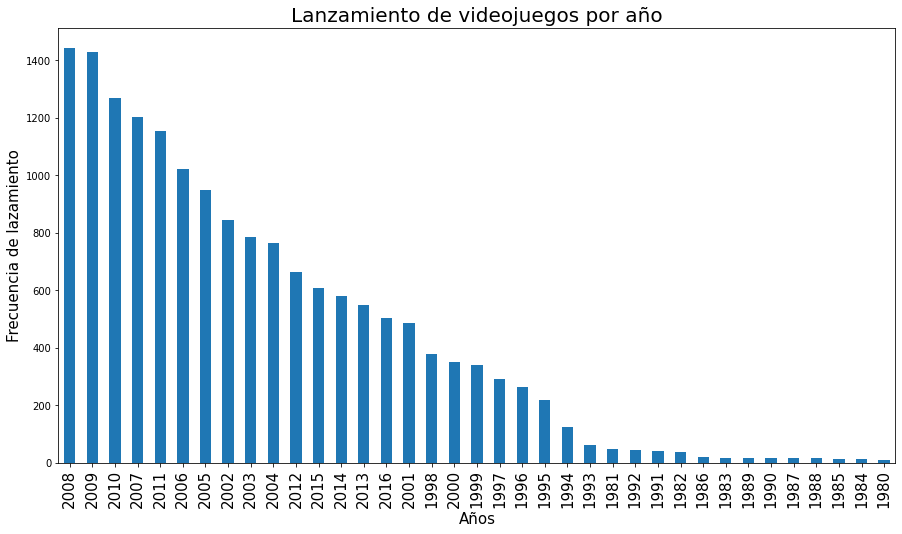

In [55]:
#Lanzamientos por año
plt.figure(figsize=(15, 10))
data["year_of_release"].value_counts().plot(kind="bar", figsize=(15, 8))
plt.title("Lanzamiento de videojuegos por año", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Años', fontsize=15)
plt.ylabel('Frecuencia de lazamiento', fontsize=15)
plt.show()

Se puede apreciar, que en los años 90's y 80's, habían menos de 200 lanzamientos por año. A continuación, se realizará un diagrama de caja para visualizar el comportamiento de la distribución de los datos. 

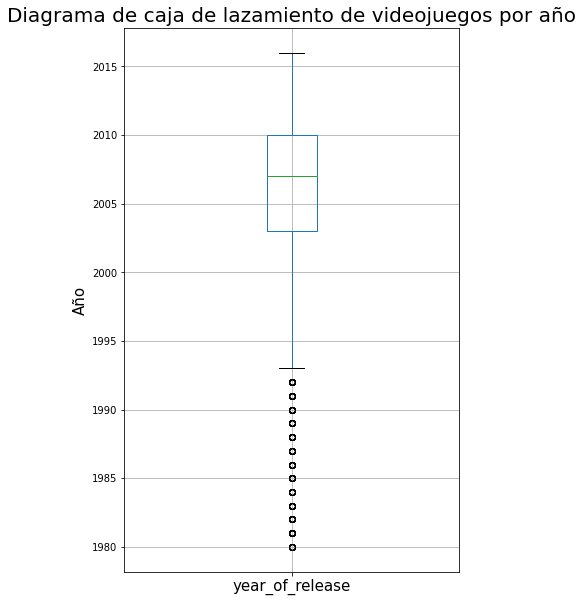

In [56]:
data.plot(y="year_of_release", figsize=(6,10), kind="box", grid=True)
plt.title("Diagrama de caja de lazamiento de videojuegos por año", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Año', fontsize=15)
plt.show()


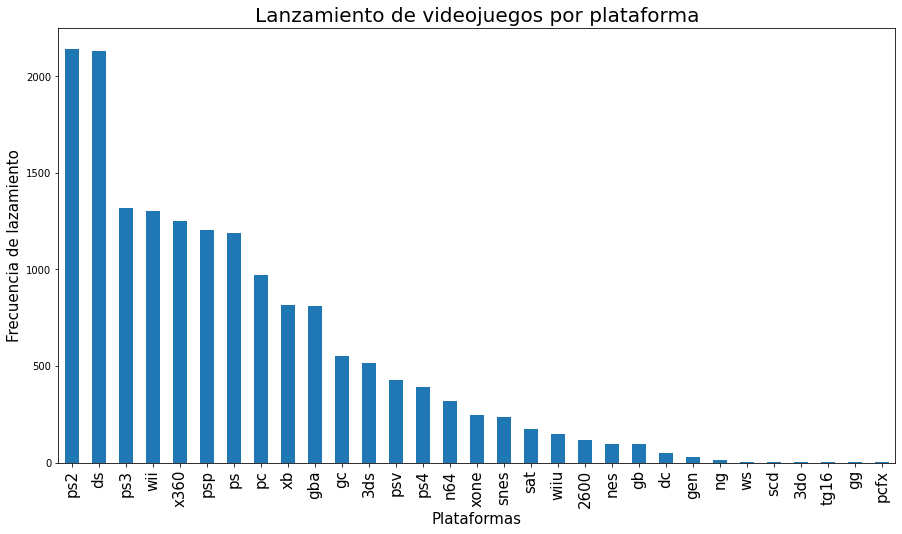

In [121]:
plt.figure(figsize=(15, 10))
data["platform"].value_counts().plot(kind="bar", figsize=(15, 8))
plt.title("Lanzamiento de videojuegos por plataforma", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Plataformas', fontsize=15)
plt.ylabel('Frecuencia de lazamiento', fontsize=15)
plt.show()

Distribución de videojuegos por consola

Se pueden apreciar valores atípicos por debajo del año 1994 aproximadamente.
Para poder conocer los límites de los valores atípicos, se calculará el valor teórico del limite superior e inferior.

In [58]:
q1 = data["year_of_release"].quantile(0.25)
q3 = data["year_of_release"].quantile(0.75)
iqr = q3 - q1
lim_inf_year = q1 - 1.5 * iqr
lim_sup_year = q3 + 1.5 * iqr
print("Limite superior de años:", lim_sup_year)
print("Limite inferios de años:", lim_inf_year)

Limite superior de años: 2020.5
Limite inferios de años: 1992.5


Los datos significativos abarcarán desde 2016 hasta 1993, conforme a los valores del rango del bigote inferior teórico.

In [59]:
#Se crea filtro
data_filtered = data.query('year_of_release >= 1993') 

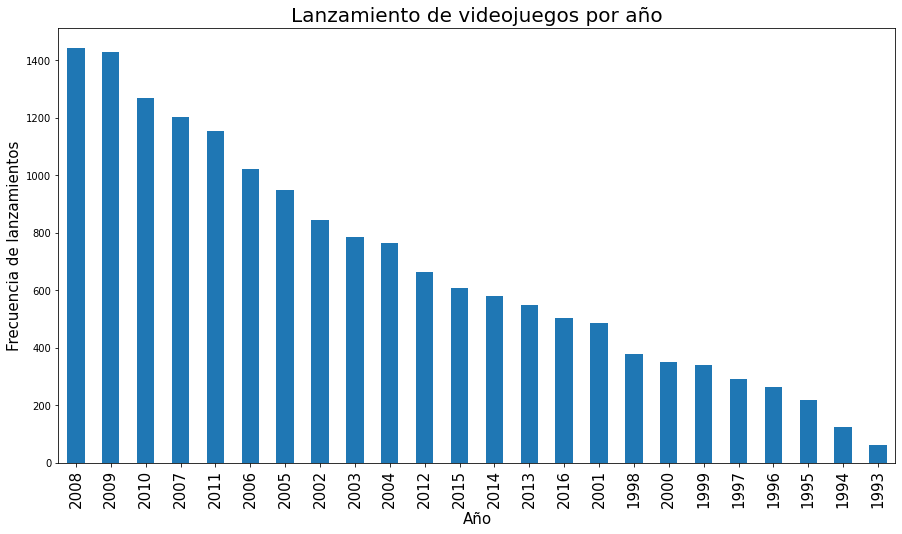

In [60]:
plt.figure(figsize=(15, 10))
data_filtered["year_of_release"].value_counts().plot(kind="bar", figsize=(15, 8))
plt.title("Lanzamiento de videojuegos por año", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Año', fontsize=15)
plt.ylabel('Frecuencia de lanzamientos', fontsize=15)
plt.show()

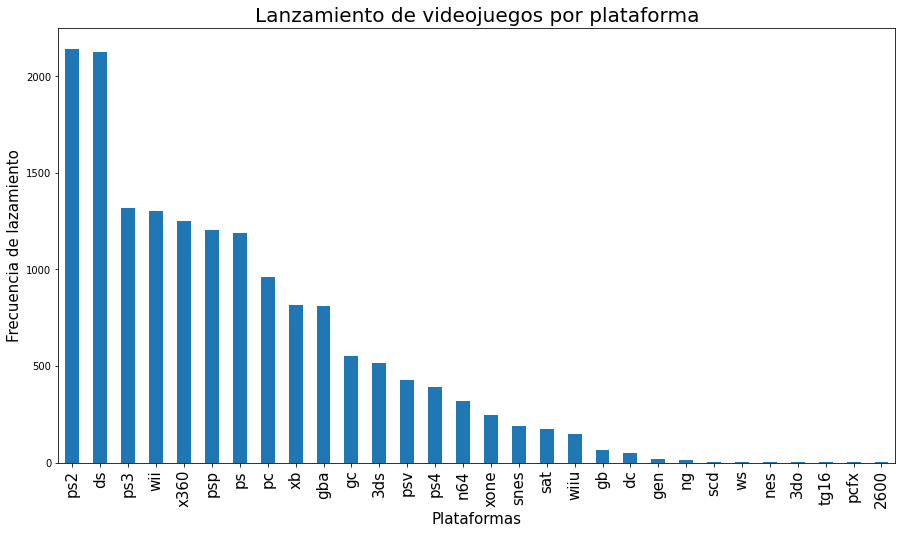

In [123]:
plt.figure(figsize=(15, 10))
data_filtered["platform"].value_counts().plot(kind="bar", figsize=(15, 8))
plt.title("Lanzamiento de videojuegos por plataforma", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Plataformas', fontsize=15)
plt.ylabel('Frecuencia de lazamiento', fontsize=15)
plt.show()

Se puede apreciar, que algunas consolas desaperecieron, debido a que los videojuegos son muy antiguos y pueden causar ruido al momento de realizar el analisis.

In [61]:
print("Porcentaje de datos filtrados:", round(len(data_filtered)/len(data), 2), "%")

Porcentaje de datos filtrados: 0.98 %


El dataframe filtrado que se utilizará para los siguientes analisis, solo cambió en menos del 1% al dataframe original

### Ventas totales por plataforma

Se estudiarán las ventas totales por consola, para medir la popularidad de la consola.

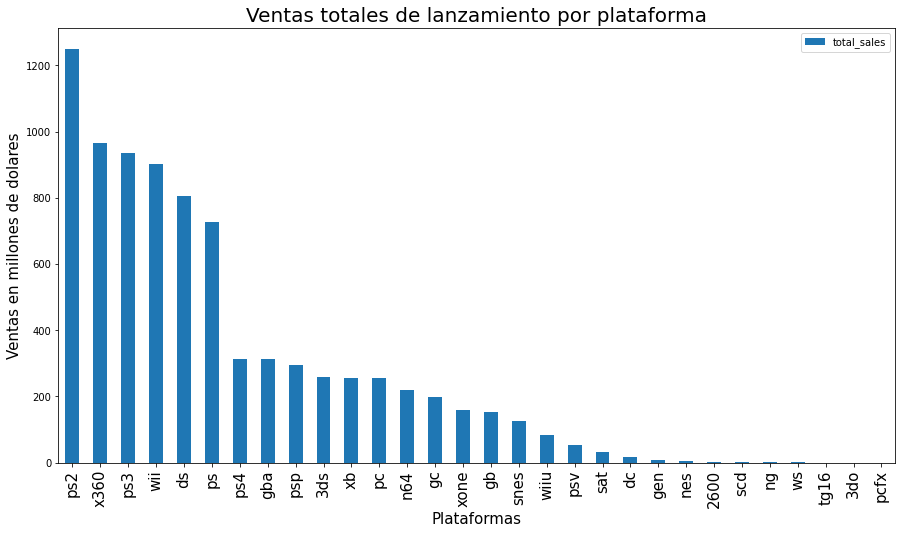

In [62]:
#Se crea una agrupan las ventas totales por consola y se crea un gráfico de barras.
data_filtered.pivot_table(index="platform", values="total_sales", 
                          aggfunc="sum").sort_values(["total_sales"], 
                          ascending=False).plot(kind="bar", figsize=(15, 8))
plt.title("Ventas totales de lanzamiento por plataforma", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Plataformas', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

Se puede apreciar que las plataformas con más ventas son el PS2, X360 y PS3. 

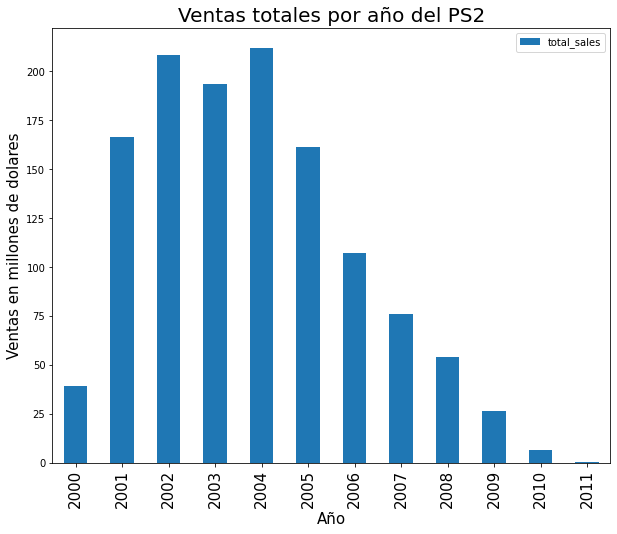

In [63]:
#Se crea una agrupan las ventas totales por del ps2 y se crea un gráfico de barras.
data_filtered.query('platform == "ps2"').pivot_table(index="year_of_release",
                                            values="total_sales", aggfunc="sum").plot(kind="bar", figsize=(10, 8))
plt.title("Ventas totales por año del PS2", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Año', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

Se puede apreciar el comportamiento de las ventas de videojuegos del PS2. Estuvo generando ganancias por 12 años, las ganancias fueron aumentando hasta el 2004, año en el que se tienen las mayores ganancias. Despues de este año, las ventas fueron reduciendose hasta el 2011.


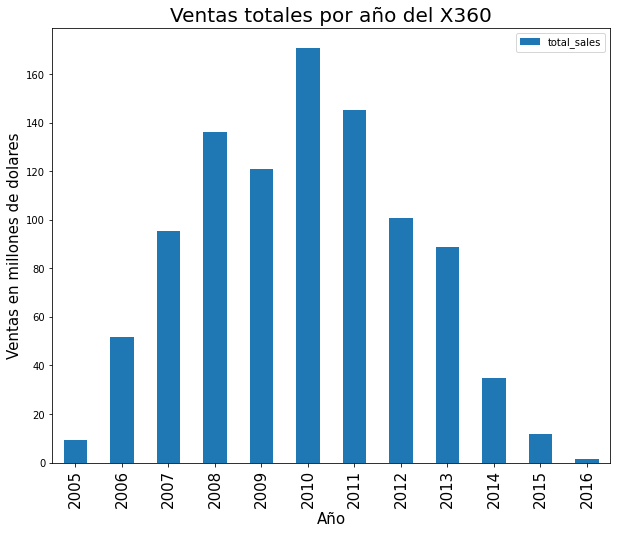

In [64]:
#Se crea una agrupan las ventas totales por del x360 y se crea un gráfico de barras.
data_filtered.query('platform == "x360"').pivot_table(index="year_of_release",
                                            values="total_sales", aggfunc="sum").plot(kind="bar", figsize=(10, 8))
plt.title("Ventas totales por año del X360", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Año', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

Se puede apreciar que la plataforma X360 tiene un comportamiento similar al PS2

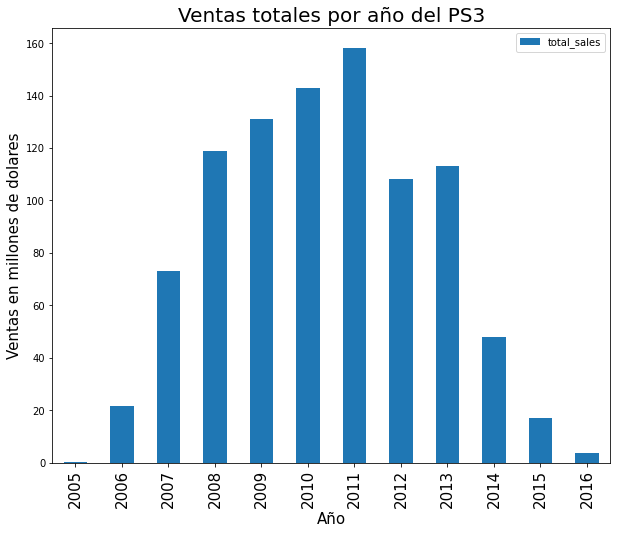

In [65]:
data_filtered.query('platform == "ps3"').pivot_table(index="year_of_release",
                                            values="total_sales", aggfunc="sum").plot(kind="bar", figsize=(10, 8))
plt.title("Ventas totales por año del PS3", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Año', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

El comportamiento es muy similar a los otros, probablementes para el 2016 ya no se tuvieron tantas ventas porque llego la siguiente generación de plataformas.

A continuación, se explorará el predecesor del ps2, el cual ya cumplió su ciclo de vida. Para ver como ser compartaron las ventas en ese periodo.

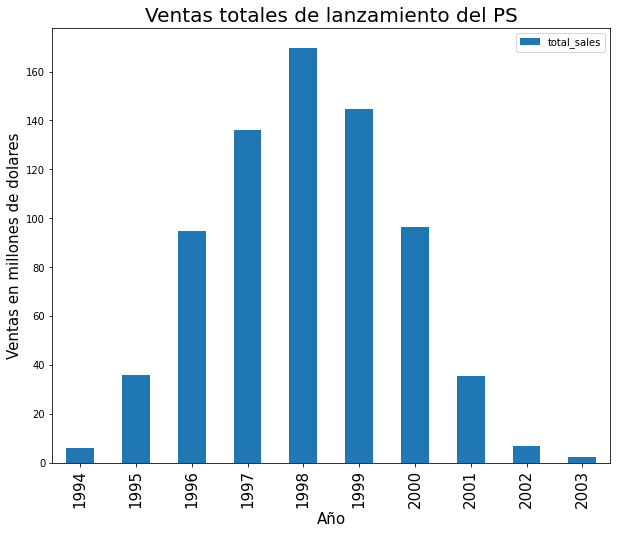

In [66]:
#Se crea una agrupan las ventas totales por del ps y se crea un gráfico de barras.
data_filtered.query('platform == "ps"').pivot_table(index="year_of_release",
                                            values="total_sales", aggfunc="sum").plot(kind="bar",
                                            figsize=(10, 8))
plt.title("Ventas totales de lanzamiento del PS", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Año', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

Se puede visualizar que el PS generó ventas por 10 años. Inicia en 1994, con un maximo de ventas en 1998; disminuyen sus ventas hasta 2003.

Se puede apreciar que apartir que el PS2 se lanzó en el 2000, las ventas decayeron subitamente en el PS para el 2001.

Por consiguiente, se puede concluir que las consolas tienen un tiempo de vida y su vida media es cuando tienen el mayor auge de ventas, hasta la siguiente generación de plataformas.

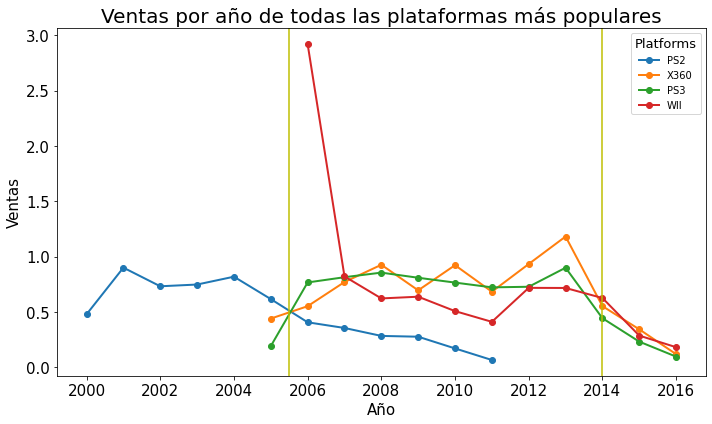

In [163]:
line = data_filtered.pivot_table(index= "year_of_release", values="total_sales", 
                          columns="platform")[["ps2","x360", "ps3", "wii"]]
plt.figure(figsize=(10,6), tight_layout=True)
plt.plot(line, 'o-', linewidth=2)
plt.title("Ventas por año de todas las plataformas más populares", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=2005.5, color='y')
plt.axvline(x=2014, color='y')
plt.xlabel('Año', fontsize=15)
plt.ylabel('Ventas', fontsize=15)
plt.legend(title='Platforms', title_fontsize = 13, labels=["PS2", "X360", "PS3", "Wii"])
plt.show()

Se eligieron las 4 plataformas más populares, se pueda apreciar la cantidad de años que dura una plataforma en el mercado y las ganancias de ventas que generó.
A continuación, se tomara una muestra de plataformas que se van actualizando cada cierto tiempo, para visualizar mejor el comportamiento de las ventas con respecto al lanzamiento de una nueva consola.

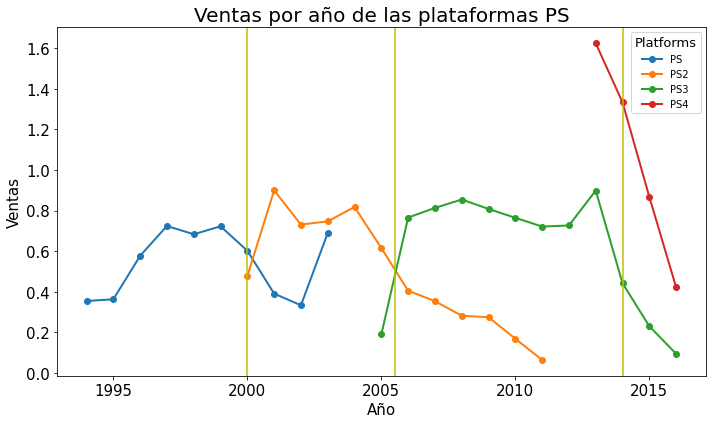

In [162]:
line = data_filtered.pivot_table(index= "year_of_release", values="total_sales", 
                          columns="platform")[["ps","ps2", "ps3", "ps4"]]
plt.figure(figsize=(10,6), tight_layout=True)
plt.plot(line, 'o-', linewidth=2)
plt.title("Ventas por año de las plataformas PS", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=2000, color='y')
plt.axvline(x=2005.5, color='y')
plt.axvline(x=2014, color='y')
plt.xlabel('Año', fontsize=15)
plt.ylabel('Ventas', fontsize=15)
plt.legend(title='Platforms', title_fontsize = 13, labels=["PS", "PS2", "PS3", "PS4"])
plt.show()

El PS estuvo generando ventas desde 1994 hasta 2003
El PS2 estuvo generando ventas desde el 2000 hasta 2011
El PS3 estuvo generando ventas desde  el 2005 hasta el 2016
El PS4 estuvo generando ventas desde 2013 hasta el 2016.

Las 3 plataformas tardan en promedio 10 años en el mercado. Se puede apreciar que cuando sale una nueva plataforma, las ventas disminuyen en la antigua consola y van aumentando en la nueva.

Por consiguiente se puede deducir, que la plataforma PS4 aun falta por llegar a su pico de ventas pero es muy probable que tenga más ganancias de ventas en 2017.

### Distribución por géneros

A continuación, se realizará un analasis midiendo el impacto que tiene el género que las ventas totales.

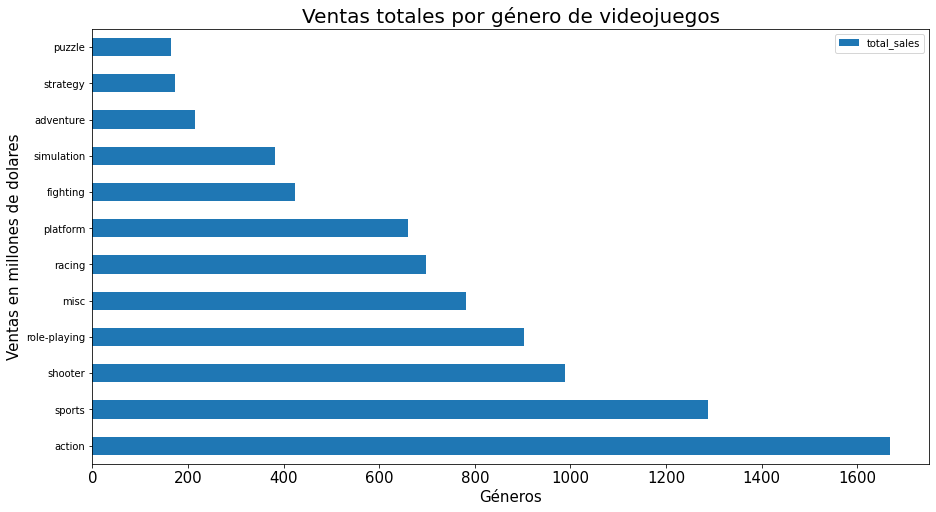

In [165]:
data_filtered.pivot_table(index="genre", values="total_sales", aggfunc="sum").sort_values(["total_sales"], 
                          ascending=False).plot(kind="barh", figsize=(15, 8))
plt.title("Ventas totales por género de videojuegos", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Géneros', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

Se puede visualizar que el genéro con más ventas son los de acción, luego deportes y disparos.
Los videojuegos con menos ventas son los de rompecabezas, estrategía y aventura.

A continuación, se escogeran las plataformas X360, PS3 y Wii, para visualizar si hay varaciones en las ventas por genero.


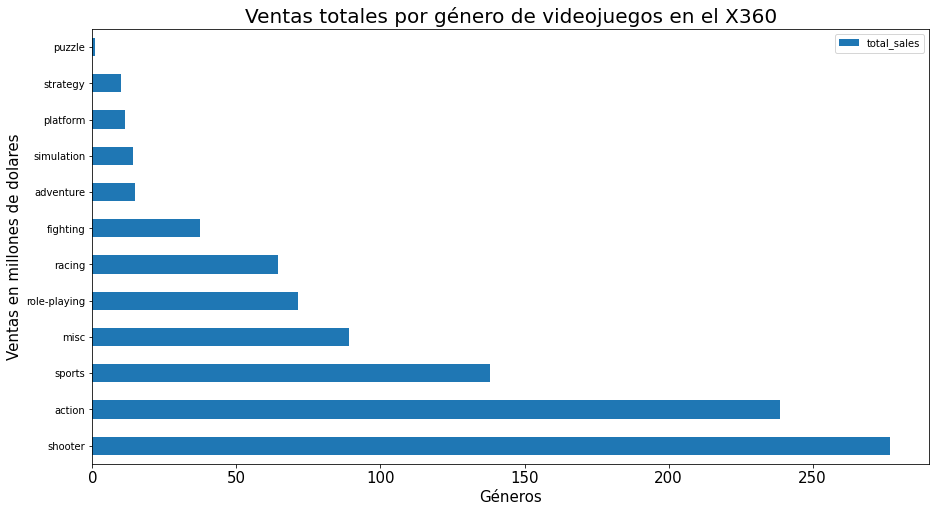

In [166]:
data_filtered.query('platform == "x360"').pivot_table(index="genre", 
                          values="total_sales", aggfunc="sum").sort_values(["total_sales"], 
                          ascending=False).plot(kind="barh", figsize=(15, 8))
plt.title("Ventas totales por género de videojuegos en el X360", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Géneros', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

Las categorías que más vendieron de la plataforma X360 son disparos, acción y deportes. Las categorías que menos regalías obtuvieron fueron rompecabezas, estrategia y plataformas.

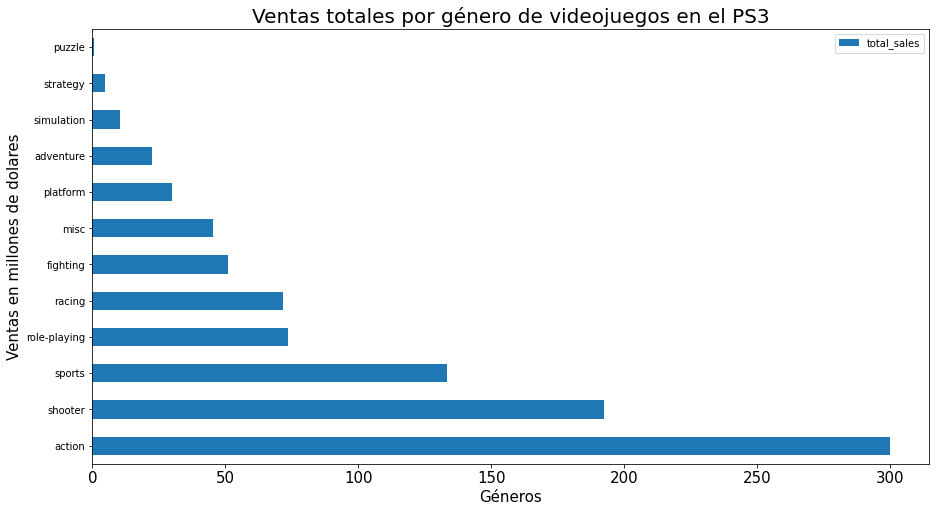

In [167]:
data_filtered.query('platform == "ps3"').pivot_table(index="genre", 
                          values="total_sales", aggfunc="sum").sort_values(["total_sales"], 
                          ascending=False).plot(kind="barh", figsize=(15, 8))
plt.title("Ventas totales por género de videojuegos en el PS3", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Géneros', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

Las categorías que más vendieron de la plataforma PS3 son acción, disparos y deportes. Las categorías que menos regalías obtuvieron fueron rompecabezas, estrategia y simulación.

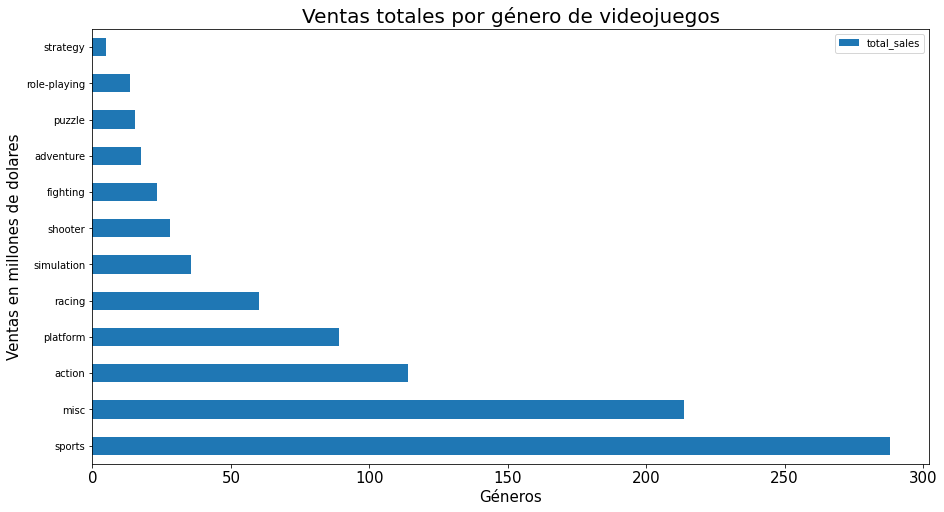

In [168]:
data_filtered.query('platform == "wii"').pivot_table(index="genre", 
                          values="total_sales", aggfunc="sum").sort_values(["total_sales"], 
                          ascending=False).plot(kind="barh", figsize=(15, 8))
plt.title("Ventas totales por género de videojuegos", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Géneros', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

Las categorías que más vendieron de la plataforma wii son deportes, miscelaneos y acción. Las categorías que menos regalías obtuvieron fueron estrategia, juego de rol y rompecabezas.

En conclusión, no se puede determinar que los generos de los videojuegos están directamente vinculados a las ventas totales de las plataformas. Debido a que las plataformas estan hechas para cierto público y experiencia, por consiguiente las ventas de los géneros variaran entre las plataformas.

### Distribución de las ventas con respecto la crítica y crítica del usuario.

Se estudiará primero la relación entre las ventas por plataforma y la crítica. Despues, se examinará la crítica del usuario.

In [74]:
critic_data = data.query('platform == "ps2"').loc[:, ["platform", "critic_score", "user_score", "total_sales"]]

,critic_score,user_score,total_sales
critic_score,1.000000,0.562454,0.395377
user_score,0.562454,1.000000,0.173522
total_sales,0.395377,0.173522,1.000000


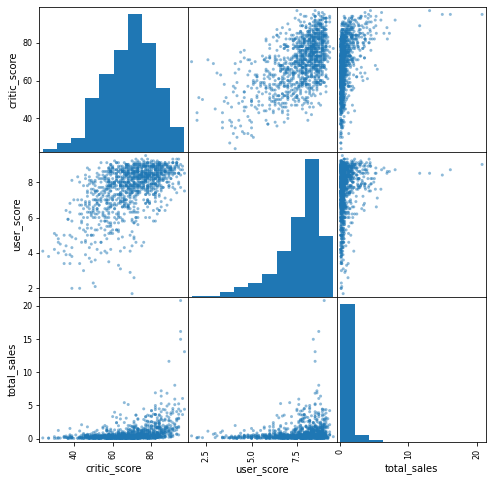

In [75]:
display(critic_data.corr())
pd.plotting.scatter_matrix(critic_data, figsize=(8, 8))
plt.show()


Se puede apreciar en el gráfico que hay una correlación pequeña directamente proporcional entre la critica profesional y las ventas. De igual manera, hay una correlación más pequeña directamente proporcional entre la critica del usuario y las ventas.

In [76]:
critic_data = data.query('platform == "x360"').loc[:, ["platform", "critic_score", "user_score", "total_sales"]]

,critic_score,user_score,total_sales
critic_score,1.000000,0.621253,0.392022
user_score,0.621253,1.000000,0.113283
total_sales,0.392022,0.113283,1.000000


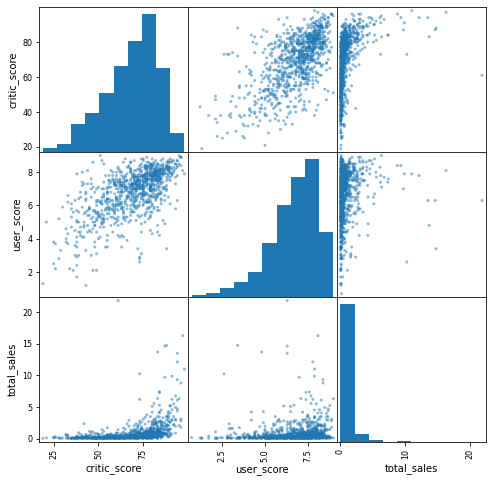

In [77]:
display(critic_data.corr())
pd.plotting.scatter_matrix(critic_data, figsize=(8, 8))
plt.show()


Se puede apreciar en el gráfico que hay una correlación pequeña directamente proporcional entre la critica profesional y las ventas. De igual manera, hay una correlación más pequeña directamente proporcional entre la critica del usuario y las ventas.

In [78]:
critic_data = data.query('platform == "ps3"').loc[:, ["platform", "critic_score", "user_score", "total_sales"]]

,critic_score,user_score,total_sales
critic_score,1.000000,0.628833,0.432275
user_score,0.628833,1.000000,0.127811
total_sales,0.432275,0.127811,1.000000


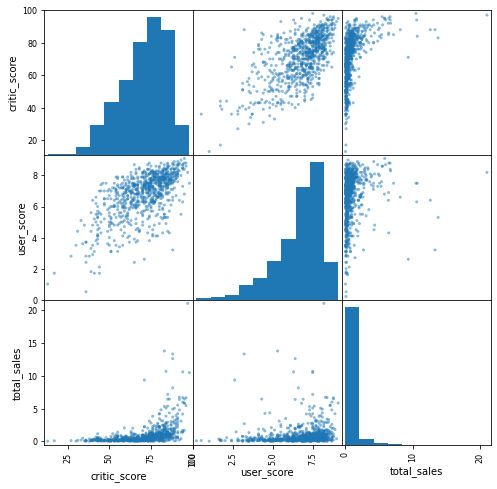

In [79]:
display(critic_data.corr())
pd.plotting.scatter_matrix(critic_data, figsize=(8, 8))
plt.show()

Se puede apreciar en el gráfico que hay una correlación pequeña directamente proporcional entre la critica profesional y las ventas. De igual manera, hay una correlación más pequeña directamente proporcional entre la critica del usuario y las ventas.

Se puede concluir, que a pesar que el indice de correlación es muy pequeño, el puntaje de un profesional afectan más a las ventas totales de un juego, que el puntaje dado por el usuario.

In [80]:
data_filtered.query('name == "grand theft auto v"')[["name", "platform","critic_score", "user_score", "total_sales"]]

,name,platform,critic_score,user_score,total_sales
16,grand theft auto v,ps3,97.0,8.2,21.05
23,grand theft auto v,x360,97.0,8.1,16.27
42,grand theft auto v,ps4,97.0,8.3,12.62
165,grand theft auto v,xone,97.0,7.9,5.47
1722,grand theft auto v,pc,96.0,7.9,1.17


La conclusión anterior se pueda visualizar en esta muestra, el juego `grand theft auto v` salio para 4 plataformas, recibió un puntaje de crítica profesional y de usuario similar, pero en cada plataforma las ventas fueron distintas. 
Esto puede deberse a que la experiencia entre las plataformas es distinta, a pesar que sea el mismo juego.

## Perfiles de usuario por región

Se crearán perfiles de por cada región y se analizarán las plataformas principales, los géneros principales y la correlación entre la clasificación y las ventas.

### Ventas por plataforma por región

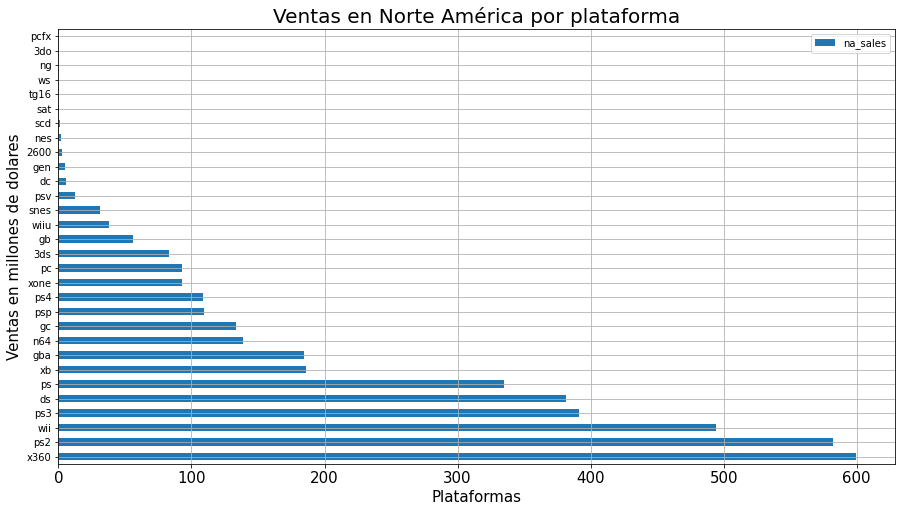

In [191]:
data_filtered.pivot_table(index="platform", values="na_sales", 
                          aggfunc="sum").sort_values(["na_sales"], 
                          ascending=False).plot(kind="barh", figsize=(15, 8), grid=True)
plt.title("Ventas en Norte América por plataforma", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Plataformas', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

En Norte América las 5 plataformas con más ventas son:
1-. X360
2-. PS2
3-. Wii
4-. PS3
5-. DS

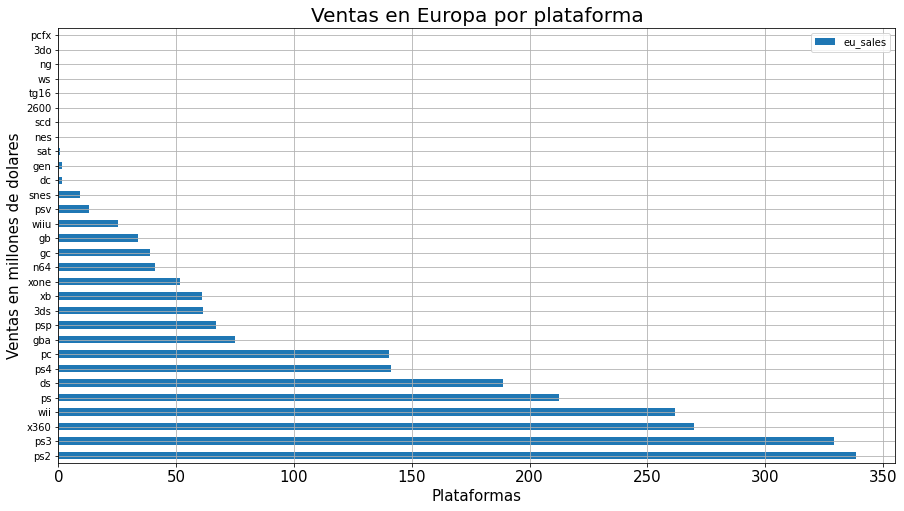

In [190]:
data_filtered.pivot_table(index="platform", values="eu_sales", 
                          aggfunc="sum").sort_values(["eu_sales"], 
                          ascending=False).plot(kind="barh", figsize=(15, 8), grid=True)
plt.title("Ventas en Europa por plataforma", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Plataformas', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

En Europa las 5 plataformas con más ventas son:

1-. PS2
2-. PS3
3-. X360
4-. Wii
5-. PS

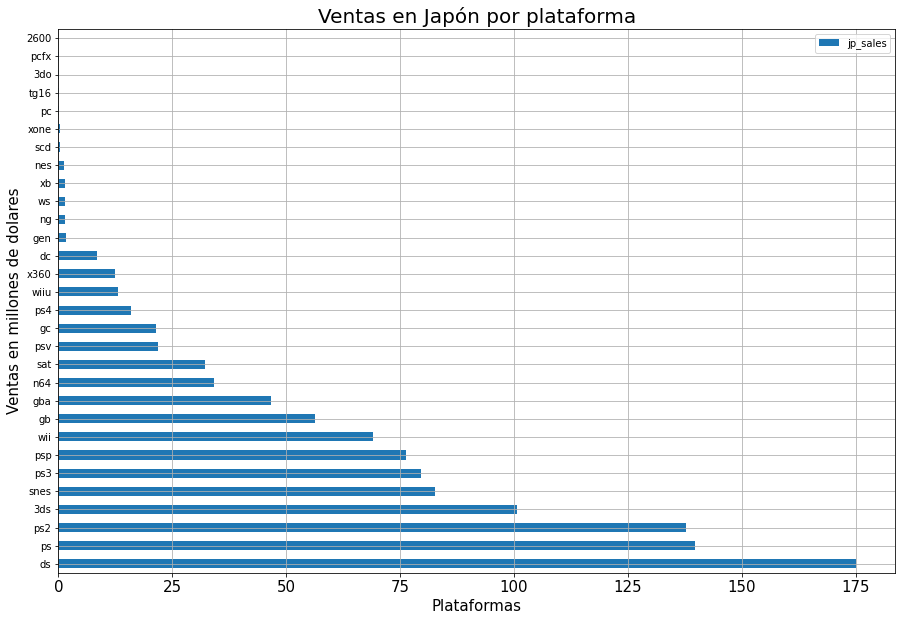

In [189]:
data_filtered.pivot_table(index="platform", values="jp_sales", 
                          aggfunc="sum").sort_values(["jp_sales"], 
                          ascending=False).plot(kind="barh", figsize=(15, 10), grid=True)
plt.title("Ventas en Japón por plataforma", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Plataformas', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

En Japón las 5 plataformas con más ventas son:

1-. DS
2-. PS
3-. PS2
4-. 3DS
5-. SNES

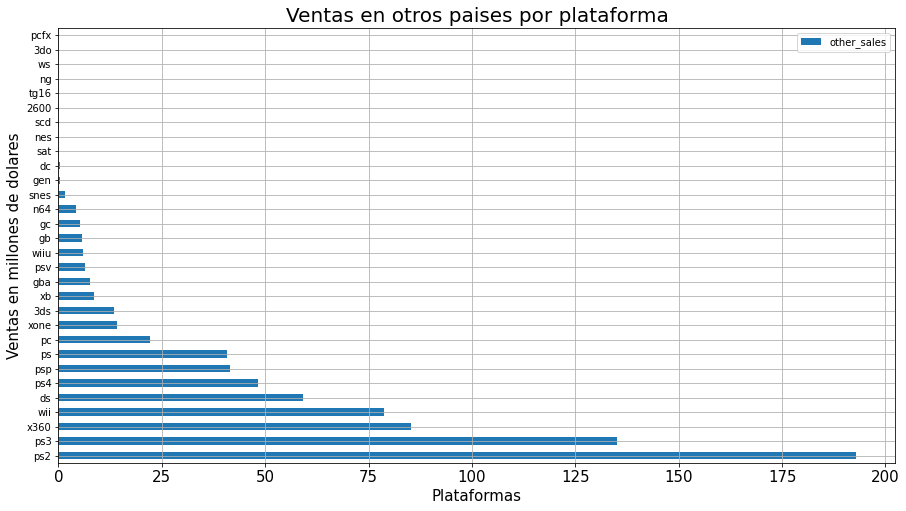

In [184]:
data_filtered.pivot_table(index="platform", values="other_sales", 
                          aggfunc="sum").sort_values(["other_sales"], 
                          ascending=False).plot(kind="barh", figsize=(15, 8), grid=True)
plt.title("Ventas en otros paises por plataforma", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Plataformas', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

En Norte América las 5 plataformas con más ventas son:

1-. PS2
2-. PS3
3-. X360
4-. Wii
5-. DS

Se puede visualizar que en las regiones difieren entre las plataformas con más ventas. En Norte America se vendió más el X360, mientras que en Japón las ventas fueron muy bajas. Esto puede deberse al origen de creación de las consolas.



### Ventas por género por región

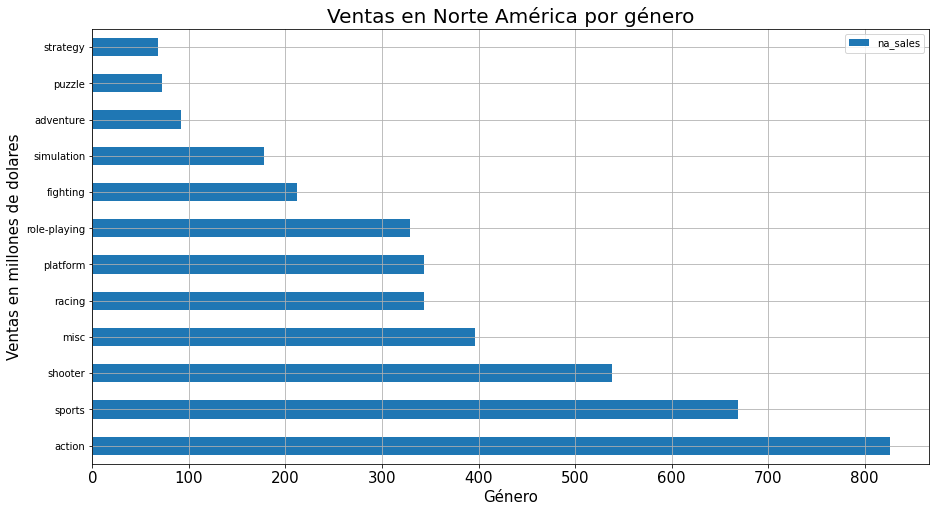

In [183]:
data_filtered.pivot_table(index="genre", values="na_sales", 
                          aggfunc="sum").sort_values(["na_sales"], 
                          ascending=False).plot(kind="barh", figsize=(15, 8), grid=True)
plt.title("Ventas en Norte América por género", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Género', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

En Norte América los géneros más populares son:

1-. Acción.
2.- Deportes
3-. Disparos
4-. Miscelaneo
5-. Carreras

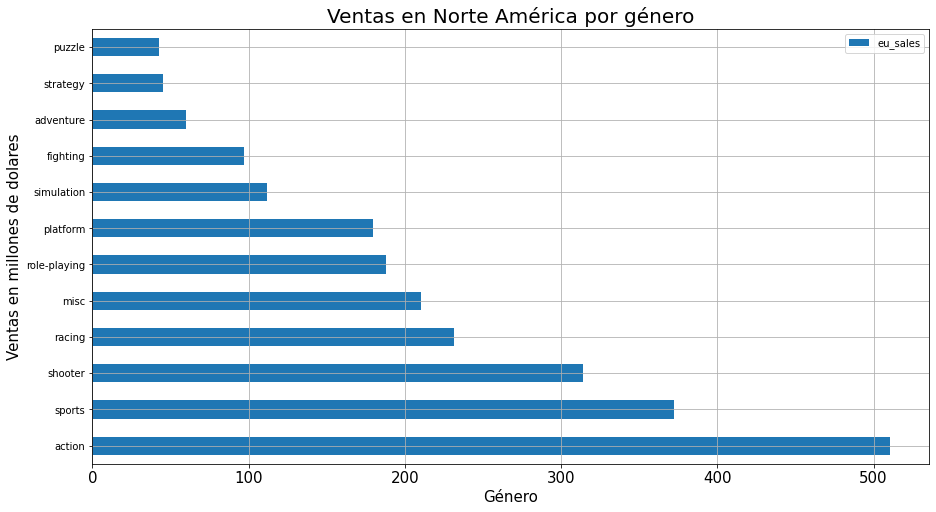

In [182]:
data_filtered.pivot_table(index="genre", values="eu_sales", 
                          aggfunc="sum").sort_values(["eu_sales"], 
                          ascending=False).plot(kind="barh", figsize=(15, 8), grid=True)
plt.title("Ventas en Norte América por género", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Género', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

En Europa los géneros más populares son:

1-. Acción.
2.- Deportes
3-. Disparos
4-. Carreras
5-. Miscelaneo

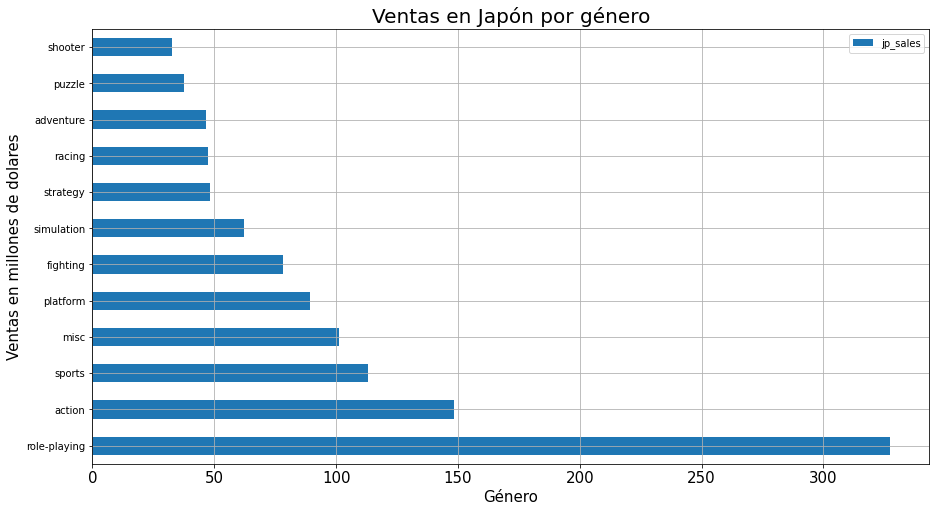

In [180]:
data_filtered.pivot_table(index="genre", values="jp_sales", 
                          aggfunc="sum").sort_values(["jp_sales"], 
                          ascending=False).plot(kind="barh", figsize=(15, 8), grid=True)
plt.title("Ventas en Japón por género", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Género', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

En Japón los géneros más populares son:

1-. Juego de rol
2.- Accion
3-. Deportes
4-. Miscelaneo
5-. Plataforma

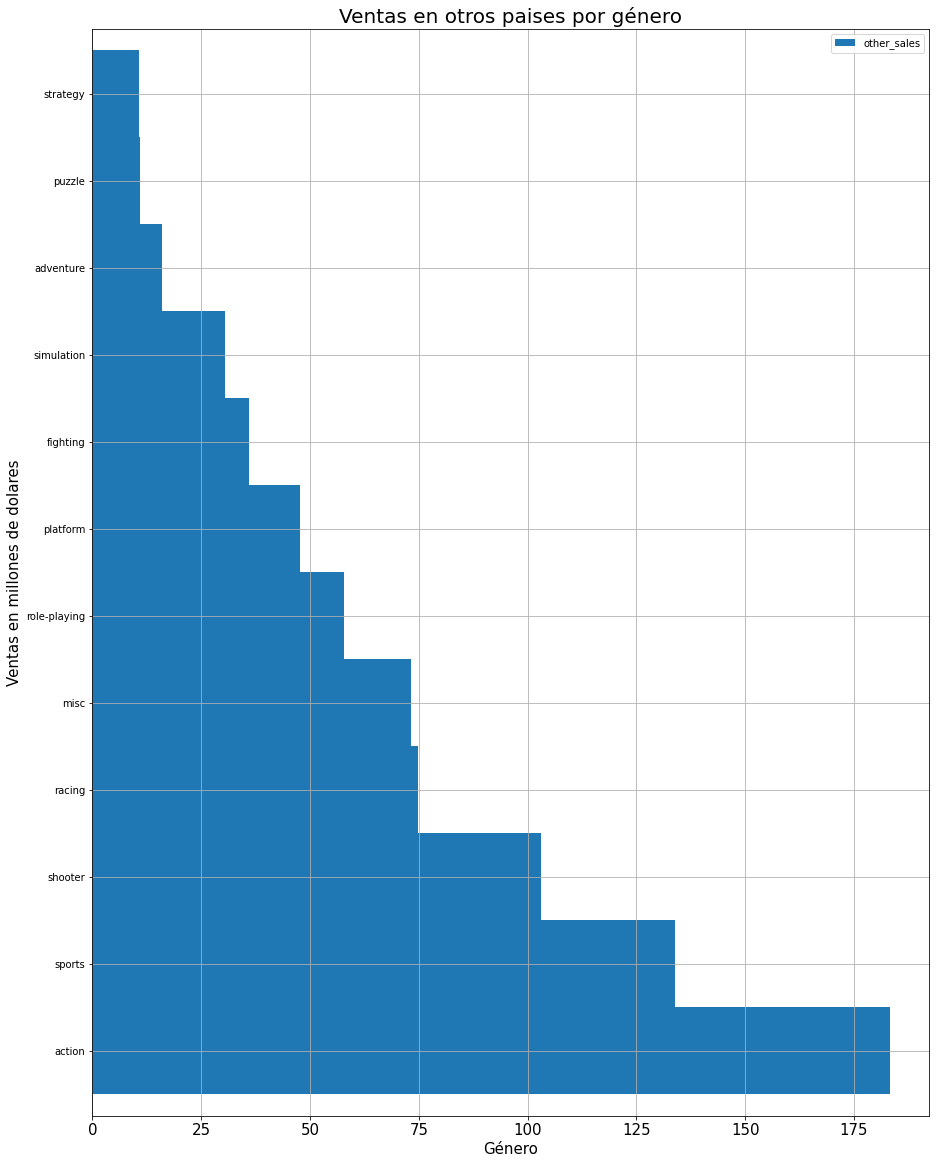

In [195]:
data_filtered.pivot_table(index="genre", values="other_sales", 
                          aggfunc="sum").sort_values(["other_sales"], 
                          ascending=False).plot(kind="barh", figsize=(15, 8), grid=True)
plt.title("Ventas en otros paises por género", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Género', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

En otros paises los géneros más populares son:

1-. Acción.
2.- Deportes
3-. Disparos
4-. Carreras
5-. Miscelaneo

Se puede concluir que las ventas por género son similares, los géneros favoritos son acción, deportes, disparos, carreras y miscelane, pero los géneros más vendidos en Japón difieren un poco con el resto, el género de disparos es el que genera menos ventas.


### Ventas por clasificación por región

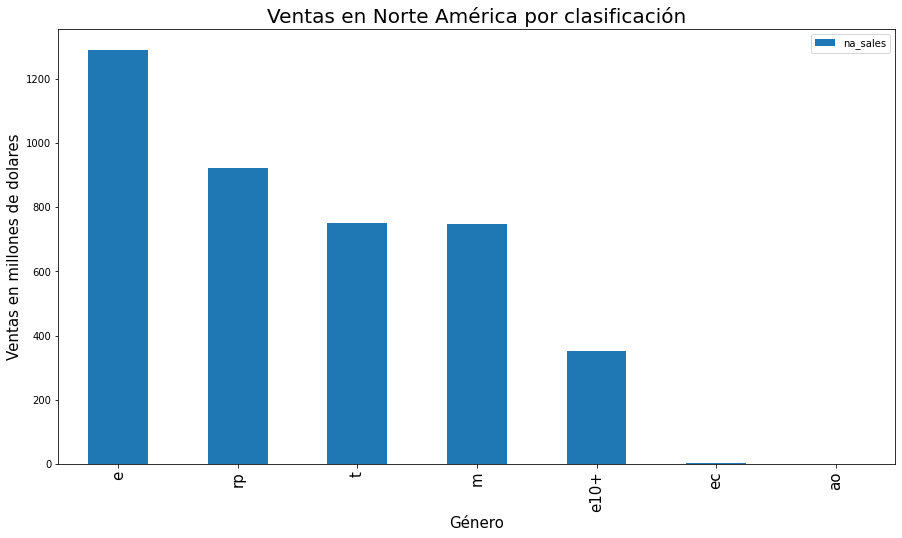

In [177]:
data_filtered.pivot_table(index="rating", values="na_sales", 
                          aggfunc="sum").sort_values(["na_sales"], 
                          ascending=False).plot(kind="bar", figsize=(15, 8))
plt.title("Ventas en Norte América por clasificación", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Género', fontsize=15, rotation=0)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

En Norte América los videojuegos con mayor ventas son los clasfiación E, luego los RP y en tercero T.

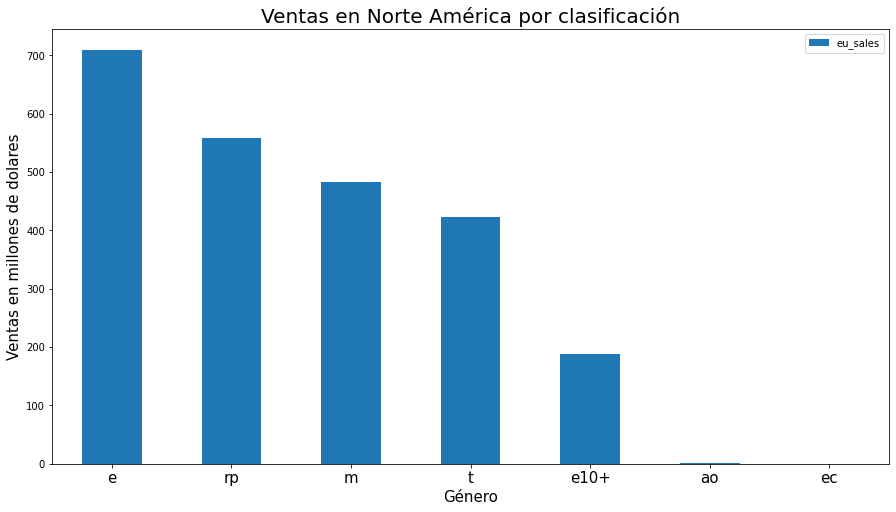

In [176]:
data_filtered.pivot_table(index="rating", values="eu_sales", 
                          aggfunc="sum").sort_values(["eu_sales"], 
                          ascending=False).plot(kind="bar", figsize=(15, 8))
plt.title("Ventas en Norte América por clasificación", fontsize=20)
plt.xticks(fontsize=15, rotation=0)
plt.xlabel('Género', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

La región de Europa parece seguir la misma tendencia de Norte América con la diferencia que la tercer clasificación más vendias en M.

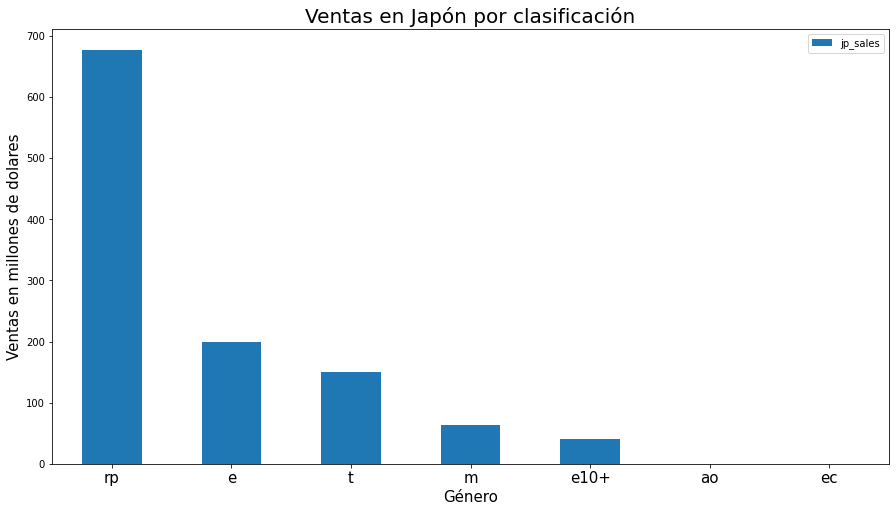

In [175]:
data_filtered.pivot_table(index="rating", values="jp_sales", 
                          aggfunc="sum").sort_values(["jp_sales"], 
                          ascending=False).plot(kind="bar", figsize=(15, 8))
plt.title("Ventas en Japón por clasificación", fontsize=20)
plt.xticks(fontsize=15, rotation=0)
plt.xlabel('Género', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

En Japón la clasifiación más vendida es RP, luego E y en tercer lugar T.

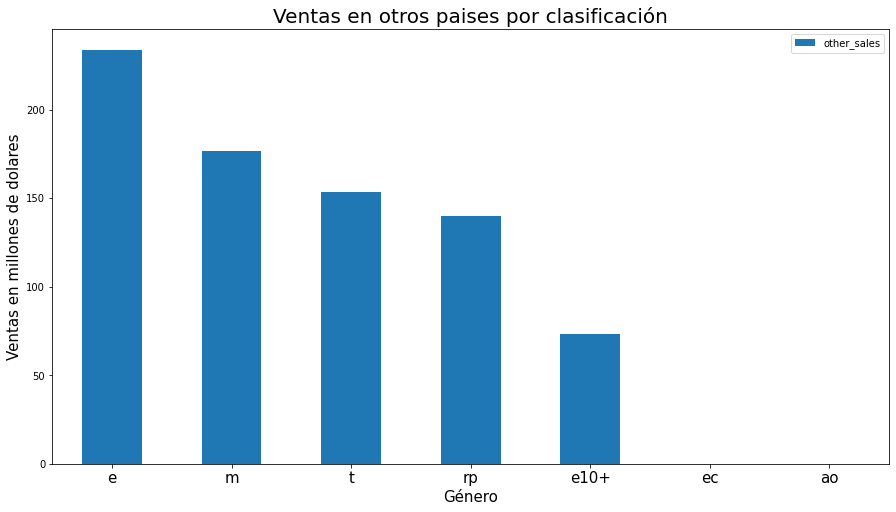

In [174]:
data_filtered.pivot_table(index="rating", values="other_sales", 
                          aggfunc="sum").sort_values(["other_sales"], 
                          ascending=False).plot(kind="bar", figsize=(15, 8))
plt.title("Ventas en otros paises por clasificación", fontsize=20)
plt.xticks(fontsize=15, rotation=0)
plt.xlabel('Género', fontsize=15)
plt.ylabel('Ventas en millones de dolares', fontsize=15)
plt.show()

En otras regiones la clasificación más vendida es E, luego M y en tercer lugar T.

En conclusión, se pudo visualizar que las categorías con más ventas son las E y RP. Se pudiera intuir que se debe a que no tienen restricción de edad, por consiguiente generan más ventas.

## Prueba de hipotesis estadísticas

La hipotesis nula sera la siguiente: **Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son diferentes.**

La hipotesis alternativa sera la siguiente: **Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.**


Antes de realizar nuestras pruebas haremos una prueba de Levene, en la cual observaremos si nuestras varianzas son homogeneas.

In [93]:
#Se adecuan los datos para el analisis
probe_1 = data_filtered.query('platform == "xone"')["user_score"].fillna(0)
probe_2 = data_filtered.query('platform == "pc"')["user_score"].fillna(0)

In [94]:
#Comprobar varianzas homgeneas
alpha = 0.05 # nivel crítico de significación estadística

results = levene(probe_1, probe_2) # tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
print('p-value:', results.pvalue)

if alpha > results.pvalue :
    print("Las varianzas no son homogeneas")
else:
    print("Las varianzas son homogeneas")

p-value: 0.8144693407476532
Las varianzas son homogeneas


La varianzas son homogeneas, por lo que se llenará el campo de equal_var con True

In [95]:
# Prueba las hipótesis
alpha = 0.05 # nivel crítico de significación estadística
results = st.ttest_ind(probe_1, probe_2, equal_var= True) # tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
print('p-value:', results.pvalue)

if alpha > results.pvalue :
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.00040591432393264655
Rechazamos la hipótesis nula


El analisis parece indicar que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son iguales.

La hipotesis nula sera la siguiente: **Las calificaciones promedio de los usuarios para los géneros de acción y deportes no son diferentes.**

La hipotesis alternativa sera la siguiente: **Las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes.**



In [96]:
#Se adecuan los datos para el analisis
probe_1 = data_filtered.query('genre == "action"')["user_score"].fillna(0)
probe_2 = data_filtered.query('genre == "sports"')["user_score"].fillna(0)

In [97]:
#Comprobar varianzas homgeneas
alpha = 0.05 # nivel crítico de significación estadística

results = levene(probe_1, probe_2) # tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
print('p-value:', results.pvalue)

if alpha > results.pvalue :
    print("Las varianzas no son homogeneas")
else:
    print("Las varianzas son homogeneas")

p-value: 0.04461348513008996
Las varianzas no son homogeneas


La varianzas no son homogeneas, por lo que se llenará el campo de equal_var con False

In [98]:
# Prueba las hipótesis
alpha = 0.05 # nivel crítico de significación estadística
results = st.ttest_ind(probe_1, probe_2, equal_var= False) # tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
print('p-value:', results.pvalue)

if alpha > results.pvalue :
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.509803151532206e-09
Rechazamos la hipótesis nula


La prueba parece indicar que las calificaciones promedio de los usurios  para los géneros de acción y deportes son diferentes

## Conclusión

A continuación se hará una recapitulación de las conclusiones llegadas en el analisis, es importante mencionar que al inicio del analisis se determinó que los videojuegos con año de lanzamiento anteriores a 1993, no fueron contemplado, debido a que de acuerdo al analisis del diagrama de caja y el valor teórico del bigote inferior, son considerados valores atípicos. 

1. Las plataformas tienen un tiempo de vida. Su vida media es cuando tienen el mayor auge de ventas, hasta la siguiente generación de plataformas.

2. Las plataformas más populares hasta el 2016 son PS2, X360 y PS3

2. Las ventas de de los videojuegos por género varían entre las plataformas. 

3. La correlación entre las ventas de un videojuego y la crítica profesional y de los usuarios, es directamente proporcional, pero es  muy pequeña casi despreciable. 

4. Los videojuegos multiplataforma con mismo puntaje de crítica, generan distintas gananas entre palataformas.

6. Las plataformas más populares son las mismas en todo el mundo, excepto Japón.

7. Las ventas por género son similares, los géneros favoritos son acción, deportes, disparos, carreras y miscelane, pero los géneros más vendidos en Japón difieren un poco con el resto, el género de disparos es el que genera menos ventas.

8. Las clasifiaciones sin restricción de edad generan más ventas en todas las regiones.

9. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son iguales.

10. Las calificaciones promedio de los usuarios  para los géneros de acción y deportes son diferentes

En resumen, las plataformas cuando recien salen no tienen tantos videojuegos y generan pocas ventas, conforme pasan los años se crean más vidoejuegos y alcanzan su auge; empiezan a decaer las ventas cuando sale una plataforma sucesora. En el analisis no salieron con muchas ventas las plataformas Xone, PS4  WiiU porque recien están iniciando, pero se espera un incremento de ventas para el 2017. La puntaje de críticas de los videojuegos no tiene influencia en el la venta total del videojuego y será estará mas relacionado a la plataforma en la que se juege. 

Las ventas de las plataformas y géneros de las regiones difieren mucho a las de Japón. Esto pude deberse a que Japón esta una de las franquicias más grande de la industria de los videojugos ´Nindendo´ y guardan la fidelidad al producto nacional. Las clasificaciones de los videojueogos que restringen la edad es un limitante a las ventas totales en las regiones.
